# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | costa teguise
City not found. Skipping...
Processing Record 3 of Set 1 | al mishkhab
Processing Record 4 of Set 1 | laguna
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | merowe
Processing Record 10 of Set 1 | pijijiapan
Processing Record 11 of Set 1 | laibin
Processing Record 12 of Set 1 | vilyuchinsk
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | uturoa
Processing Record 18 of Set 1 | usogorsk
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | garmisch-partenkirchen
Processing Record 21 of S

In [128]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
            
# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [129]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,9.34,90,92,0.89,NZ,1690415007
1,al mishkhab,31.8042,44.4911,32.06,12,0,2.70,IQ,1690415008
2,laguna,38.4210,-121.4238,38.63,31,0,5.14,US,1690415009
3,puerto natales,-51.7236,-72.4875,-1.12,92,100,1.51,CL,1690414762
4,ushuaia,-54.8000,-68.3000,0.81,80,20,7.72,AR,1690414962


In [130]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [131]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.34,90,92,0.89,NZ,1690415007
1,al mishkhab,31.8042,44.4911,32.06,12,0,2.70,IQ,1690415008
2,laguna,38.4210,-121.4238,38.63,31,0,5.14,US,1690415009
3,puerto natales,-51.7236,-72.4875,-1.12,92,100,1.51,CL,1690414762
4,ushuaia,-54.8000,-68.3000,0.81,80,20,7.72,AR,1690414962


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

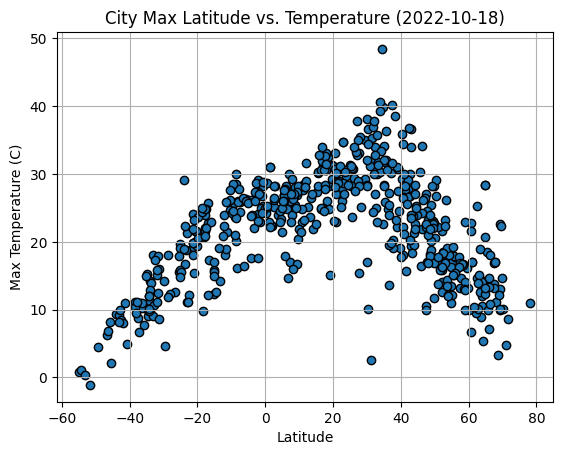

In [132]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",linewidth=1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

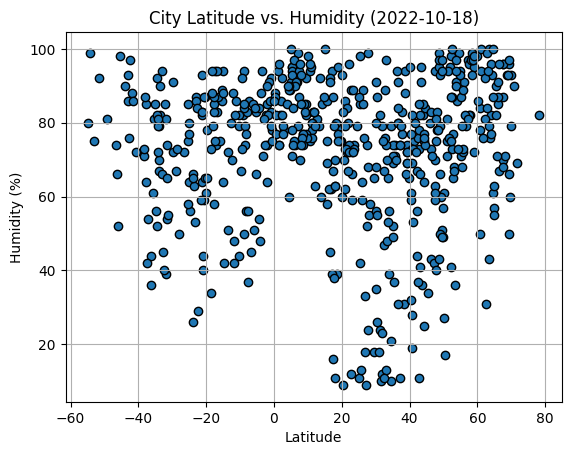

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",linewidth=1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

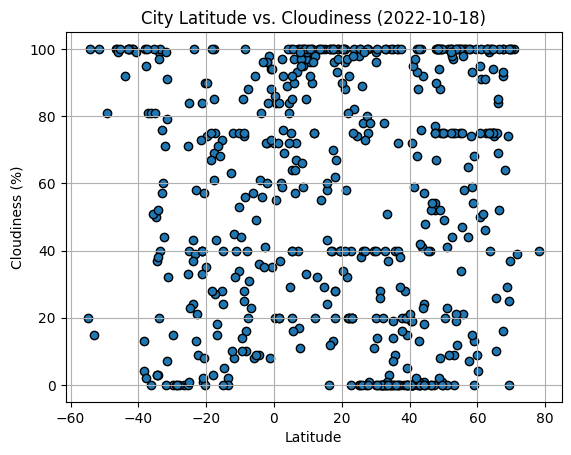

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",linewidth=1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

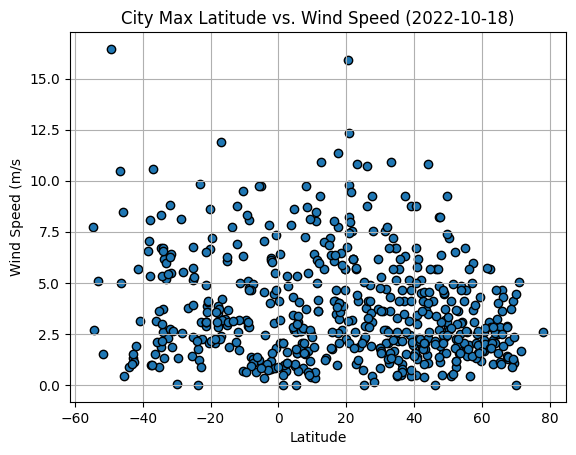

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",linewidth=1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s")
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [119]:
# Define a function to create Linear Regression plots
def linreg_plot(x_values,y_values,x_label,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regressionValues = x_values*slope+intercept
    print(f"The r-value is {rvalue}")
    plt.scatter(x_values,y_values,edgecolors="black",linewidth=1)
    plt.plot(x_values,regressionValues,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    line_label = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_label,(min(x_values),max(y_values)*.8),fontsize=15,color="red")
    plt.show()
    return


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,al mishkhab,31.8042,44.4911,32.06,12,0,2.70,IQ,1690415008
2,laguna,38.4210,-121.4238,38.63,31,0,5.14,US,1690415009
7,merowe,18.4833,31.8167,32.55,39,93,6.45,SD,1690414975
8,pijijiapan,15.7011,-93.2300,30.16,69,58,1.76,MX,1690415012
9,laibin,23.7000,109.2667,29.72,74,82,1.88,CN,1690415013


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.34,90,92,0.89,NZ,1690415007
3,puerto natales,-51.7236,-72.4875,-1.12,92,100,1.51,CL,1690414762
4,ushuaia,-54.8000,-68.3000,0.81,80,20,7.72,AR,1690414962
5,port-aux-francais,-49.3500,70.2167,4.43,81,81,16.45,TF,1690415011
6,adamstown,-25.0660,-130.1015,19.72,64,84,6.74,PN,1690415011


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.5625767997473455


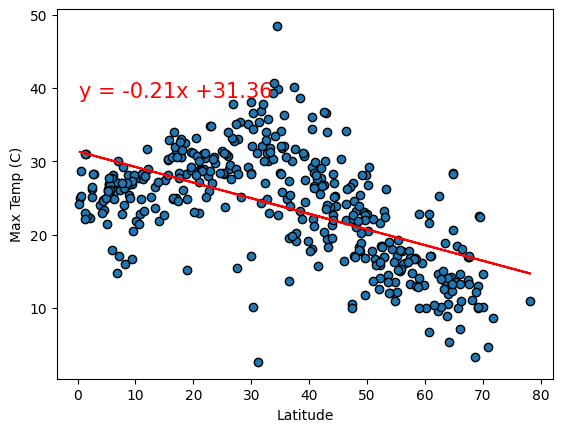

In [134]:
# Linear regression on Northern Hemisphere
linreg_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp (C)")


The r-value is 0.861680534338996


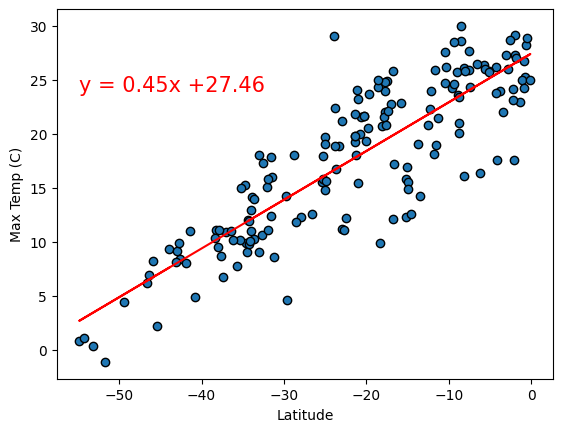

In [135]:
# Linear regression on Southern Hemisphere
linreg_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp (C)")


**Discussion about the linear relationship:**  
The relationship reflected by this data suggests that there is a correlation between the maximum temperature and latitude, with max temperature increasing as the latitude approaches approximately the 30 mark, and decreasing the further away.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.012316369580711898


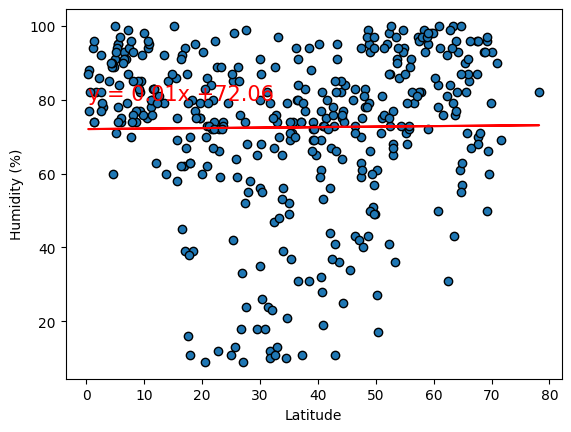

In [136]:
# Northern Hemisphere
linreg_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity (%)")


The r-value is 0.02348833179172102


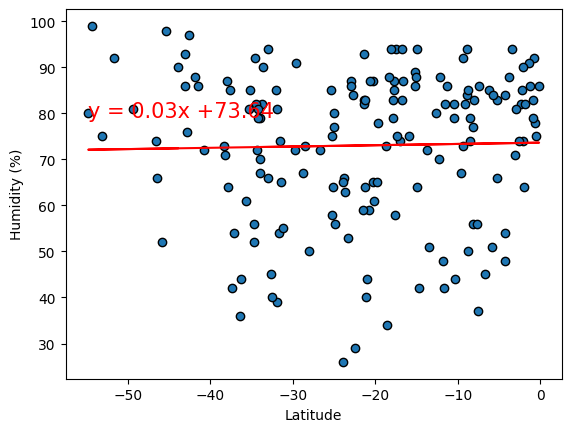

In [137]:
# Southern Hemisphere
linreg_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity (%)")


**Discussion about the linear relationship:**  
The relationship between humidity and latitude shows that for these cities, there appears to not be any significant correlation between latitude and humidity, although there are spots at latitudes around -45, 5, and 75 that show very few cities that display humidity below 60.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.04924444657945855


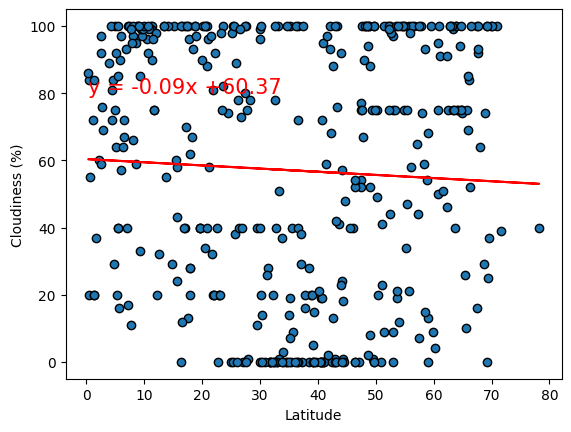

In [138]:
# Northern Hemisphere
linreg_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness (%)")


The r-value is -0.13453959866892873


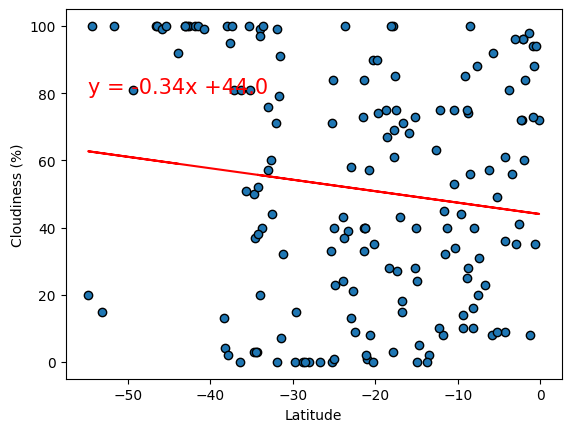

In [139]:
# Southern Hemisphere
linreg_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness (%)")


**Discussion about the linear relationship:**  
Similar to humidity vs latitude, the relationship between cloudiness and latitude does not show a clear correlation. It appears as if there are large clusters of cities in the northern hemisphere that display either 100% or 0% cloudiness, but with no significant pattern.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.17300436475541306


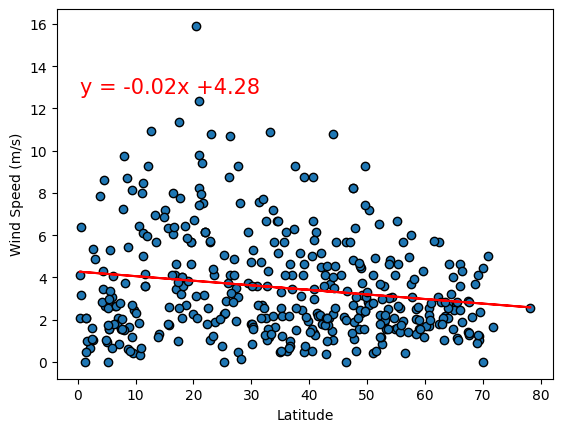

In [140]:
# Northern Hemisphere
linreg_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed (m/s)")


The r-value is -0.10500165107245098


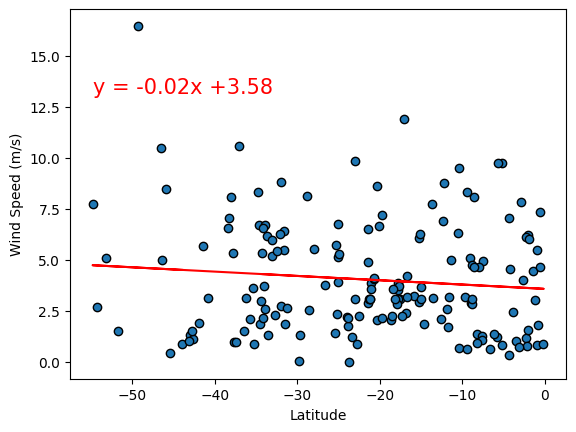

In [141]:
# Southern Hemisphere
linreg_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed (m/s)")


**Discussion about the linear relationship:**  
Like the previous two comparisons, there does not appear to be any correlation between wind speed and latitude, as although the bulk of the cities display a wind speed between 0 and 4, the distribution of the cities stays relatively uniform across all latitudes.
